<a href="https://colab.research.google.com/github/riteshy7007/CNN-Projects/blob/main/LoanStatementsClassifier10min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd # Make sure pandas is imported with the alias 'pd'
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [6]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [7]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
loan_dataset.shape

(614, 13)

In [9]:
loan_dataset.isnull().sum()
loan_dataset = loan_dataset.dropna()
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [10]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [11]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [12]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [13]:
# dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
4,51


<Axes: xlabel='Education', ylabel='count'>

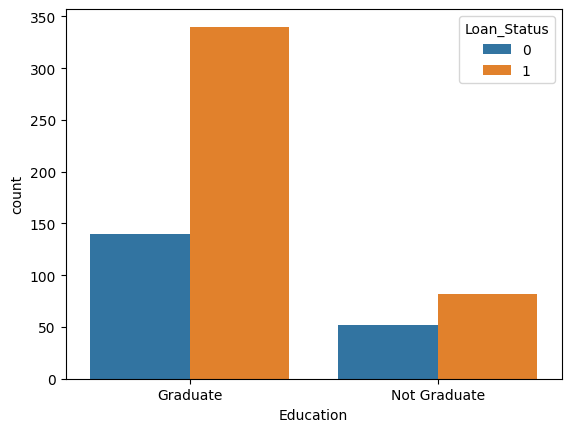

In [14]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

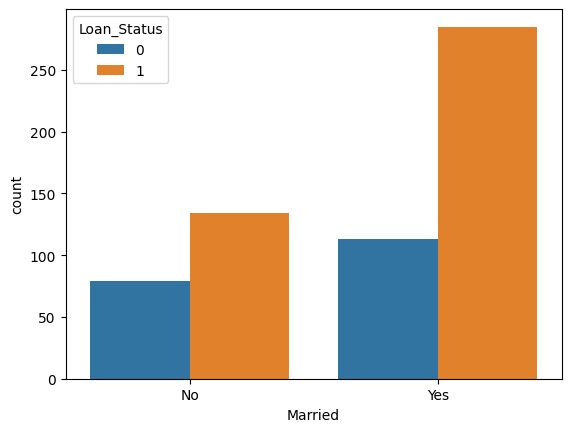

In [15]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)


In [16]:
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [17]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [18]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [19]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


In [21]:
classifier = svm.SVC(kernel='linear')

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# ... (your existing code for loading and splitting data) ...

# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well

# Fit the imputer on your training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, you can fit the classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# ... (rest of your code) ...

SVC(kernel='linear')

In [26]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [27]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8097826086956522


In [29]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [30]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8064516129032258
